In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime

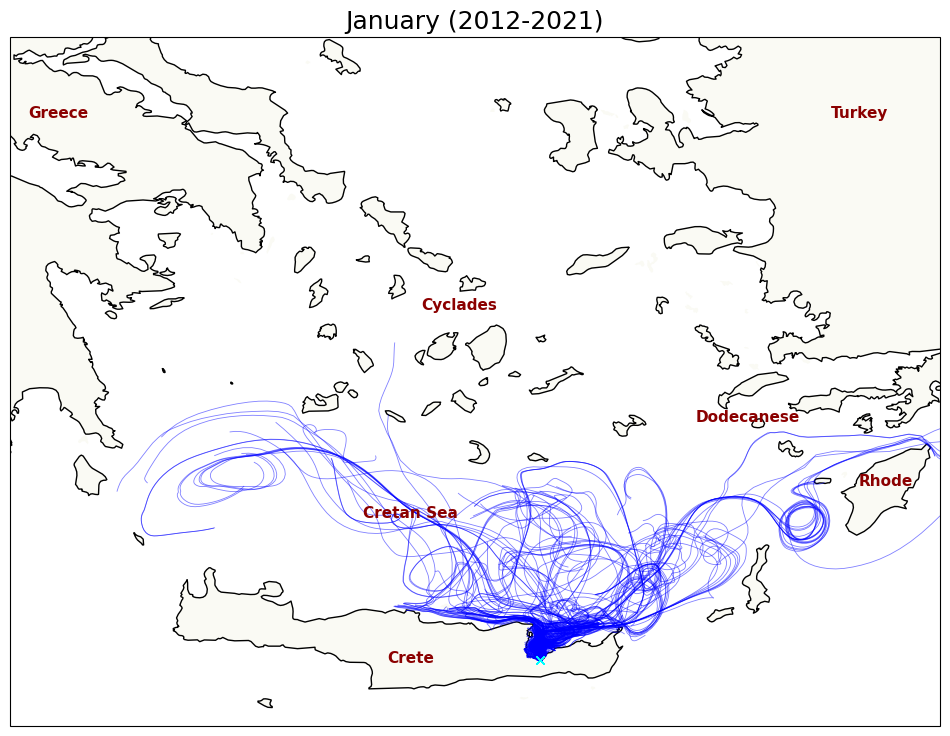

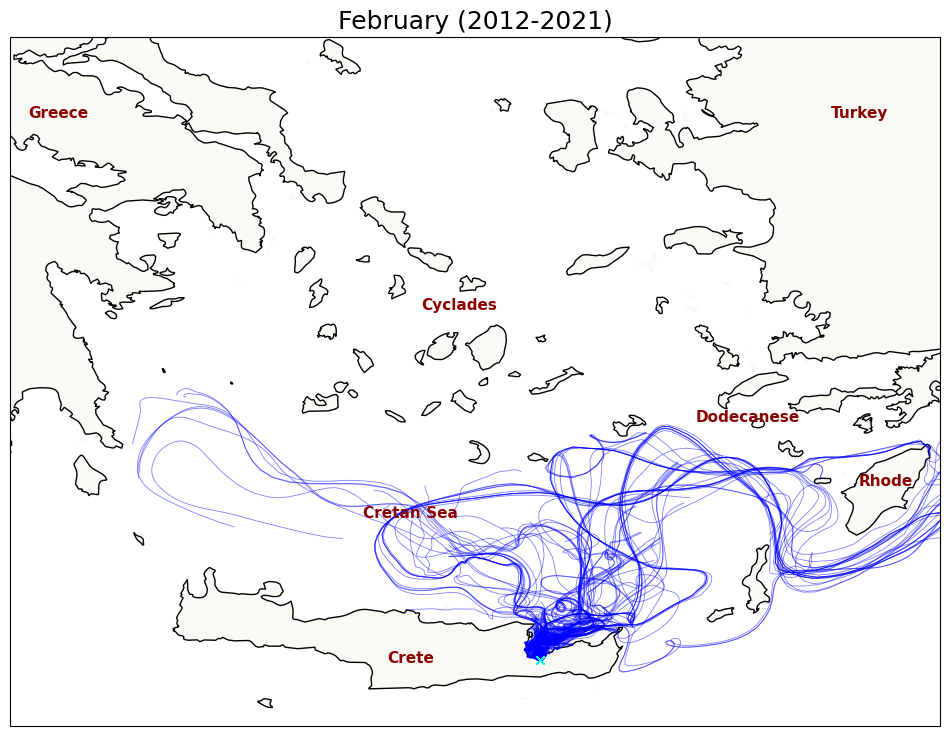

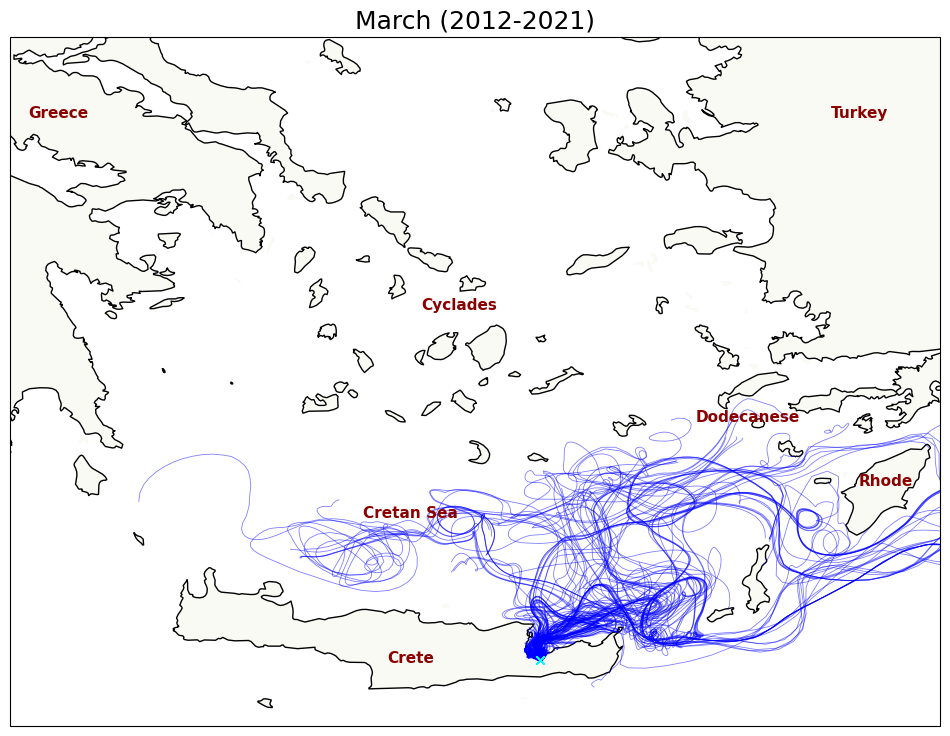

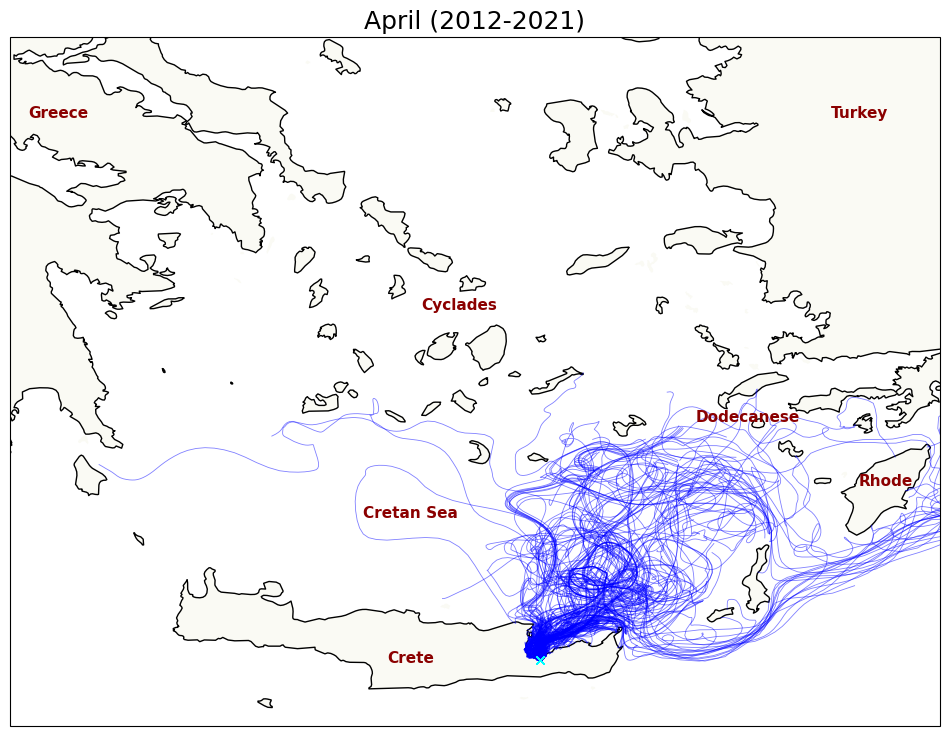

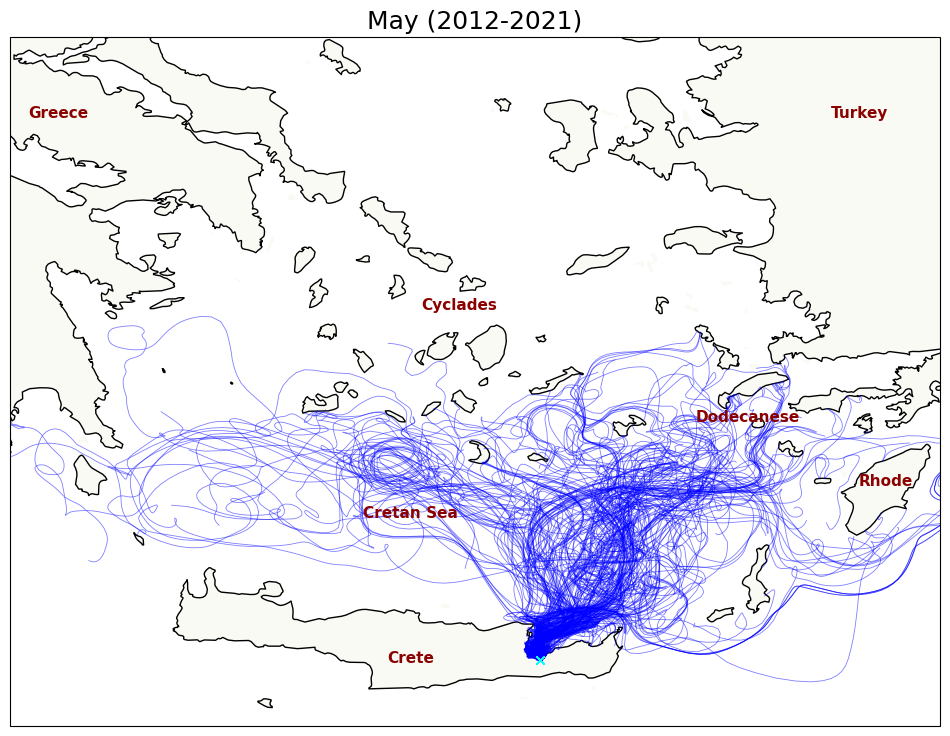

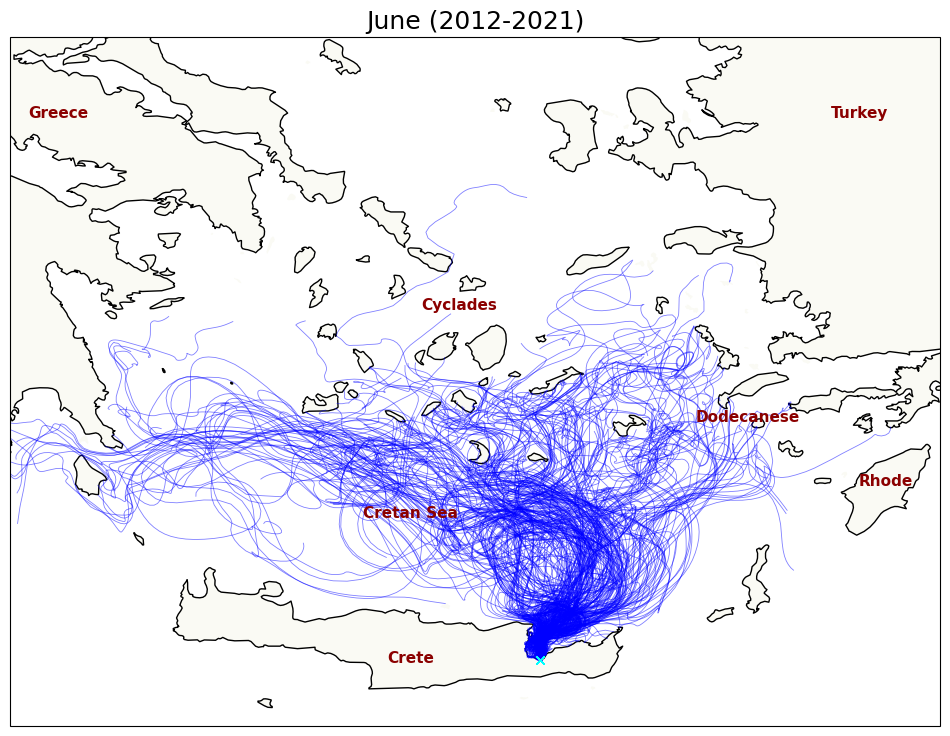

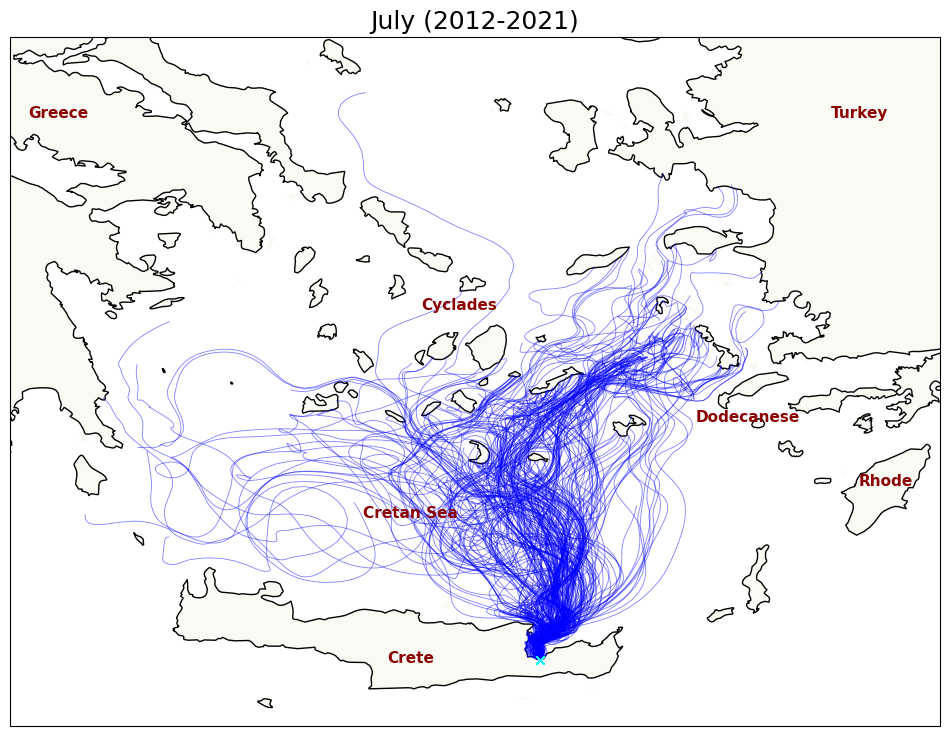

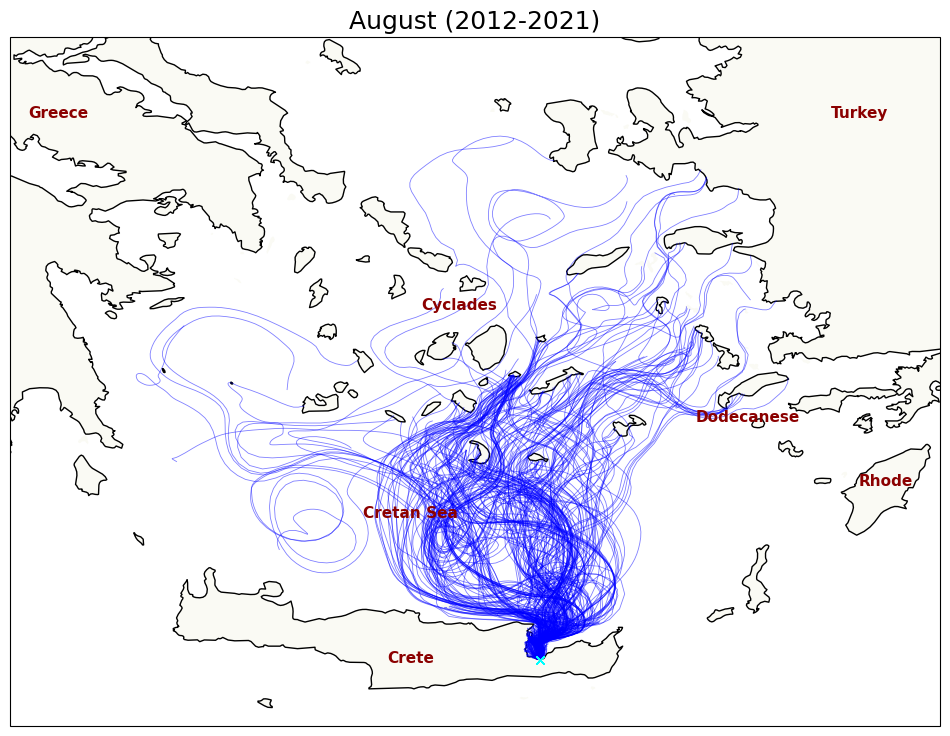

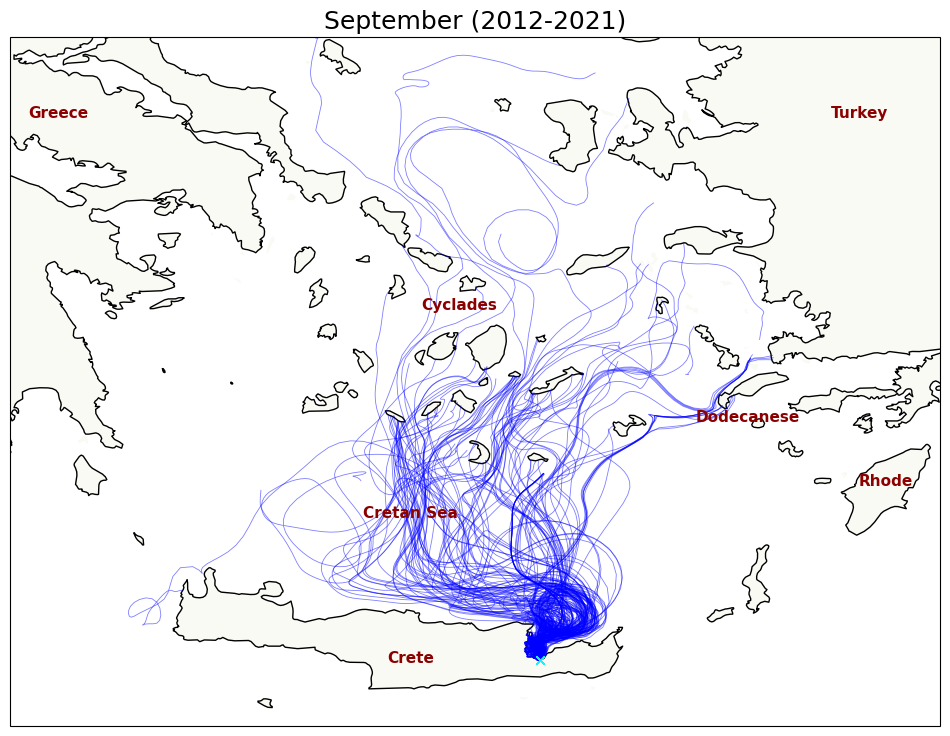

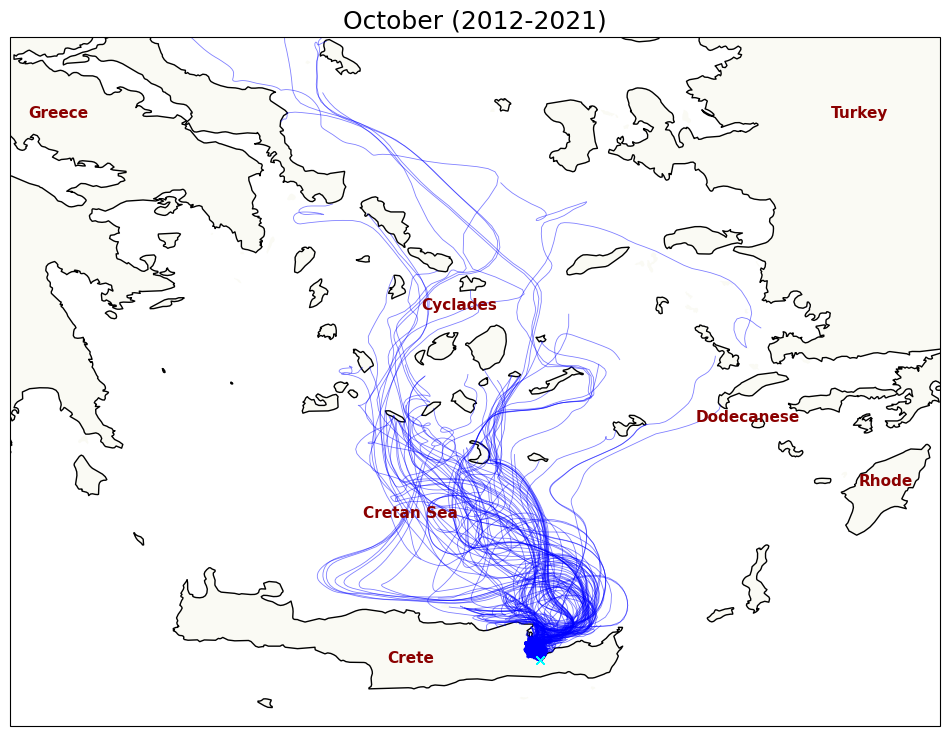

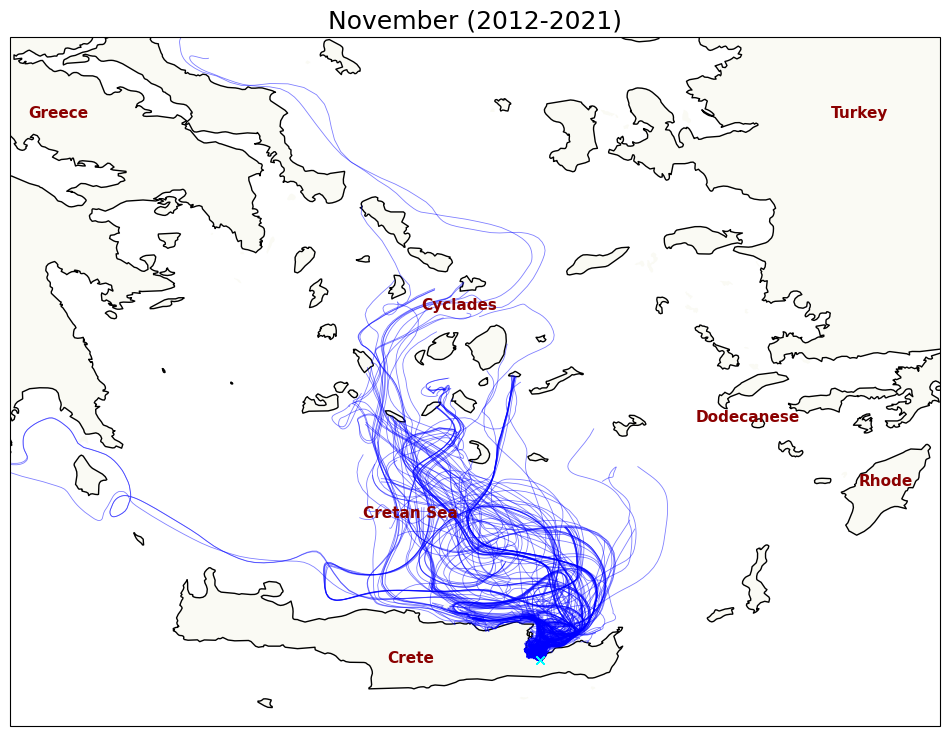

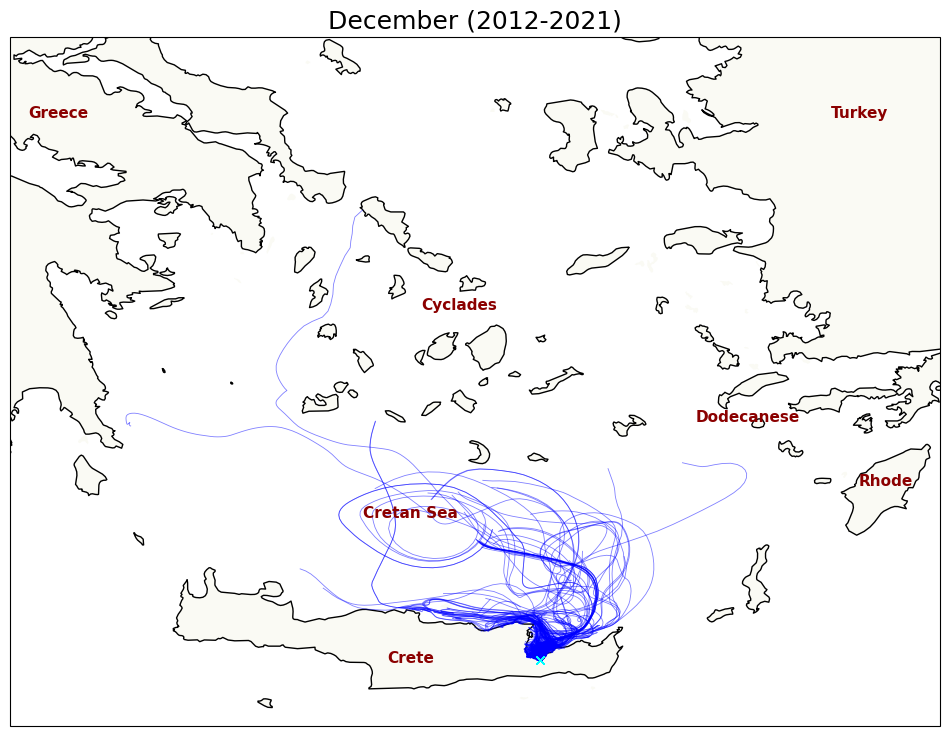

In [4]:
for m in [('jan', 1), ('feb', 2), ('mar', 3), ('apr', 4), ('may',5),\
          ('jun', 6), ('jul', 7), ('aug', 8), ('sep', 9), ('oct', 10), ('nov', 11), ('dec', 12)]:
    
    fig = plt.figure(figsize=(12,10))
    ax1 = plt.axes(projection=ccrs.PlateCarree())
    
    ax1.add_feature(cartopy.feature.LAND, zorder=1, alpha=0.3)
    ax1.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax1.coastlines('10m')
    ax1.set_extent([22.5, 28.3, 34.7, 39])  
    ax1.set_title(datetime.date(1900, m[1], 1).strftime('%B') + ' (2012-2021)', fontsize=18)

    rnames = {
        "Cyclades": (25.3, 37.3),
        "Dodecanese": (27.1, 36.6),
        "Greece": (22.8, 38.5),
        "Turkey": (27.8, 38.5),
        "Crete": (25, 35.1),
        "Cretan Sea": (25.0, 36),
        "Rhode" : {27.96, 36.2},
    }
    
    # add labels
    for group, (lon, lat) in rnames.items():
        ax1.text(lon, lat, group,
                fontsize=11, fontweight="bold", color="darkred",
                ha="center", transform=ccrs.PlateCarree())
    
    for year in range(2012,2022):
        pfd = xr.open_zarr("./output/Particles-PA-d-" + m[0] + '-' + str(year) + ".zarr")
        for d in range(30):
            x = pfd["lon"][d,:].squeeze()
            y = pfd["lat"][d,:].squeeze()
            ax1.plot(x, y, color='b', linewidth=0.6, alpha=0.5)
            ax1.plot(25.808353, 35.114241, 'x', color='cyan')
            
    plt.savefig('./figs/tracks_PA_daily_forc_' +  f"{m[1]:03}" + '.png', dpi=300, bbox_inches='tight')
    
plt.show()